### Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

### Loading dataset

In [3]:
houses_df = pd.read_csv("input.csv")

In [4]:
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Selecting the feature vectors

In [5]:
keep_col = [
    "price",
    "bedrooms",
    "sqft_lot",
    "floors"
]

houses_df = houses_df[keep_col]
houses_df.columns= ["price", "bedrooms", "sqft", "floors"]

In [6]:
houses_df.head()

,price,bedrooms,sqft,floors
0,221900.0,3,5650,1.0
1,538000.0,3,7242,2.0
2,180000.0,2,10000,1.0
3,604000.0,4,5000,1.0
4,510000.0,3,8080,1.0


### Normalization using mean and standard deviation

In [81]:
houses_mean = houses_df.mean()
houses_std = houses_df.std()

norm_df = houses_df - houses_mean
norm_df = houses_df / houses_std

y = norm_df["price"]
norm_df = norm_df.drop(labels=["price"], axis=1)

In [82]:
norm_df.head()

,bedrooms,sqft,floors
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


In [83]:
m = len(norm_df)
theta = pd.DataFrame(columns=["theta"])

for index, value in enumerate(norm_df.columns.values):
    theta.loc[index] = 0

norm_df = norm_df.astype(np.float64)

In [84]:
print(theta.shape)
print(norm_df.shape)

norm_df.head()

(3, 1)
(21613, 3)


,bedrooms,sqft,floors
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


### Compute Cost function for linear equation

In [85]:
def compute_cost(norm_df, y, theta, m):
    h_x = np.dot(norm_df, theta)
    h_x = pd.DataFrame(data=h_x)
    h_x = h_x[0]
    diff_val = h_x.subtract(y)
    square_val = diff_val ** 2
    sum_val = np.sum(square_val)
    J = sum_val / (2 * m)
    return J

### Compute Gradient descent 

In [86]:
J_history = []
def gradient(norm_df, y, theta, m, alpha):
    global J_history
    h_x = np.dot(norm_df, theta)
    h_x = pd.DataFrame(data=h_x)
    h_x = h_x[0]
    diff_val = h_x.subtract(y)
    prod_val = norm_df.apply(lambda x: x * diff_val)
    prod_val = prod_val.sum()
    delta = prod_val / m
    alpha_delta = delta * alpha
    theta = theta.apply(lambda x:x - alpha_delta.values)
    J_history.append(compute_cost(norm_df, y, theta, m))
    return theta

### Perform Linear Regression finding optimum values for theta

In [87]:
alpha = 0.0001
num_iters = 400
J_alpha = []
alpha_val = []
while alpha < 10:
    J_history = []
    for i in range(num_iters):
        theta = gradient(norm_df, y, theta, m, alpha)
    J_alpha.append(J_history)
    alpha_val.append(alpha)
    alpha *= 10

In [88]:
J_alpha = pd.DataFrame(J_alpha)
J_alpha.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.576986e+00,1.571921e+00,1.566878e+00,1.561857e+00,1.556859e+00,1.551883e+00,1.546928e+00,1.541996e+00,1.537085e+00,1.532196e+00,...,6.339003e-01,6.329981e-01,6.320999e-01,6.312056e-01,6.303153e-01,6.294290e-01,6.285465e-01,6.276679e-01,6.267933e-01,6.259224e-01
1,6.173389e-01,6.091304e-01,6.012806e-01,5.937738e-01,5.865950e-01,5.797298e-01,5.731646e-01,5.668863e-01,5.608822e-01,5.551404e-01,...,4.288538e-01,4.288525e-01,4.288512e-01,4.288500e-01,4.288487e-01,4.288475e-01,4.288462e-01,4.288450e-01,4.288437e-01,4.288425e-01
2,4.288301e-01,4.288179e-01,4.288060e-01,4.287944e-01,4.287829e-01,4.287717e-01,4.287608e-01,4.287500e-01,4.287394e-01,4.287291e-01,...,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282157e-01,4.282157e-01,4.282157e-01
3,4.282157e-01,4.282157e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282155e-01,4.282155e-01,...,2.317853e+32,3.392640e+32,4.965805e+32,7.268444e+32,1.063882e+33,1.557203e+33,2.279276e+33,3.336175e+33,4.883157e+33,7.147472e+33
4,3.181627e+36,1.416270e+39,6.304384e+41,2.806334e+44,1.249212e+47,5.560743e+49,2.475310e+52,1.101860e+55,4.904819e+57,2.183332e+60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
J_alpha.replace([np.inf, -np.inf], np.nan)
J_alpha = J_alpha.fillna(0)
J_alpha.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1.576986e+00,1.571921e+00,1.566878e+00,1.561857e+00,1.556859e+00,1.551883e+00,1.546928e+00,1.541996e+00,1.537085e+00,1.532196e+00,...,6.339003e-01,6.329981e-01,6.320999e-01,6.312056e-01,6.303153e-01,6.294290e-01,6.285465e-01,6.276679e-01,6.267933e-01,6.259224e-01
1,6.173389e-01,6.091304e-01,6.012806e-01,5.937738e-01,5.865950e-01,5.797298e-01,5.731646e-01,5.668863e-01,5.608822e-01,5.551404e-01,...,4.288538e-01,4.288525e-01,4.288512e-01,4.288500e-01,4.288487e-01,4.288475e-01,4.288462e-01,4.288450e-01,4.288437e-01,4.288425e-01
2,4.288301e-01,4.288179e-01,4.288060e-01,4.287944e-01,4.287829e-01,4.287717e-01,4.287608e-01,4.287500e-01,4.287394e-01,4.287291e-01,...,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282157e-01,4.282157e-01,4.282157e-01
3,4.282157e-01,4.282157e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282155e-01,4.282155e-01,...,2.317853e+32,3.392640e+32,4.965805e+32,7.268444e+32,1.063882e+33,1.557203e+33,2.279276e+33,3.336175e+33,4.883157e+33,7.147472e+33
4,3.181627e+36,1.416270e+39,6.304384e+41,2.806334e+44,1.249212e+47,5.560743e+49,2.475310e+52,1.101860e+55,4.904819e+57,2.183332e+60,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Plot cost function vs number of iterations for different alpha values

<IPython.core.display.Javascript object>


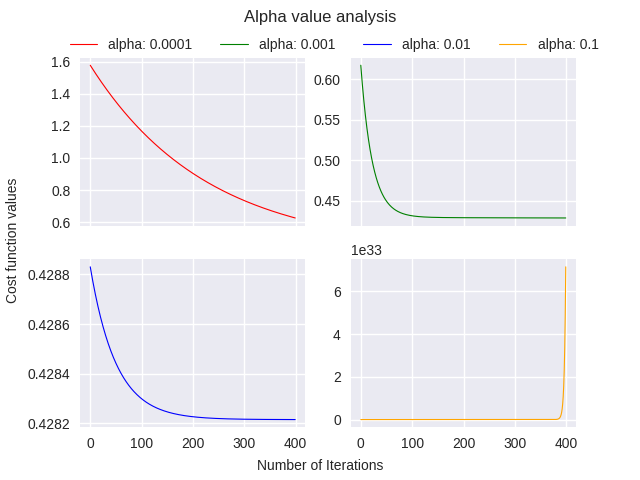

In [166]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False)
line1, = ax1.plot(np.arange(0, 400), J_alpha.iloc[0], color='r', linewidth=0.8)
line2, = ax2.plot(np.arange(0, 400), J_alpha.iloc[1], color='g', linewidth=0.8)
line3, = ax3.plot(np.arange(0, 400), J_alpha.iloc[2], color='b', linewidth=0.8)
line4, = ax4.plot(np.arange(0, 400), J_alpha.iloc[3], color='orange', linewidth=0.8)
_ = plt.figlegend(handles=[line1, line2, line3, line4], 
                  labels=["alpha: "+str(alpha_val[0]), "alpha: "+str(alpha_val[1]), "alpha: "+str(alpha_val[2]), "alpha: "+str(alpha_val[3])], 
                  ncol = 4,
                  loc = [0.1, 0.88])
_ = fig.text(0.5, 0.03, 'Number of Iterations', ha='center', va='center')
_ = fig.text(0.02, 0.5, 'Cost function values', ha='center', va='center', rotation='vertical')
_ = fig.suptitle("Alpha value analysis", fontsize=12)